In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

In [112]:
from sklearn.metrics import accuracy_score

In [5]:
df = sns.load_dataset("iris")

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Aprendizaje NO SUPERVISADO

In [15]:
X = df.drop("species", axis=1)

In [22]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
# Aprendizaje no supervisado: Clustering
# K-MEANS

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


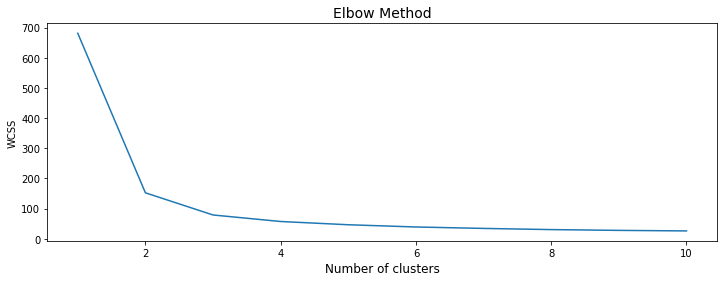

In [30]:
# Elbow method
plt.figure(figsize=(12,4))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=41)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('WCSS')
plt.show()

In [31]:
kmeans = KMeans(n_clusters = 3) # Inicializar el modelo
kmeans.fit(X) #Entrenamiento

KMeans(n_clusters=3)

In [32]:
clusters = kmeans.predict(X) #Prediccion

In [33]:
df["clusters"] = clusters

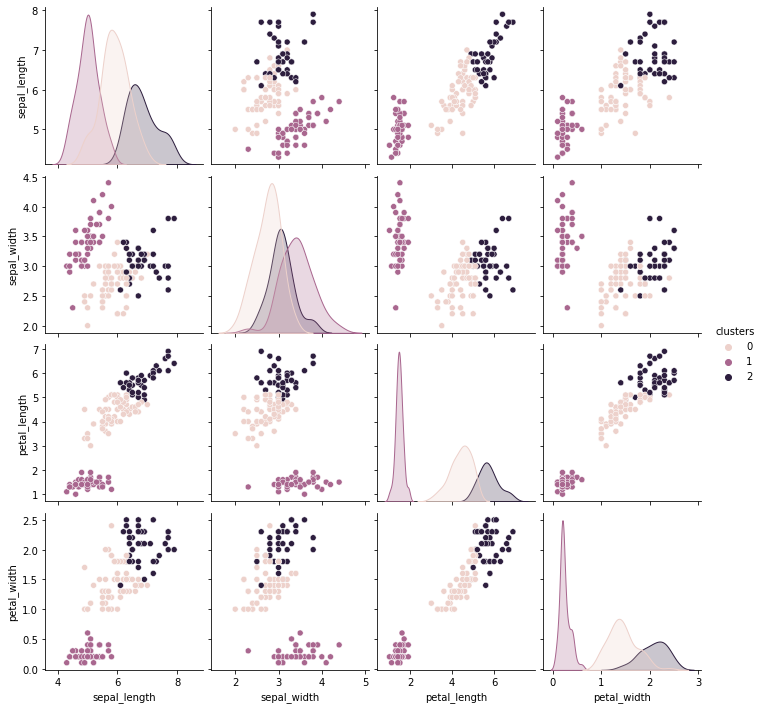

In [34]:
sns.pairplot(df, hue="clusters")

In [ ]:
# Caracterizacion de clusters. 
# Encontrar características que distingan a los diferentes clusters

# Aprendizaje Supervisado

In [36]:
df = sns.load_dataset("iris")

In [51]:
X = df.drop("species", axis=1) #features
y = df["species"] #clases

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

#test size: 0.20, 0.25, 0.3, 0.33

In [119]:
rf = RandomForestClassifier(n_estimators = 150, max_depth=10) #Inicializacion de modelo
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=150)

In [120]:
y_pred = rf.predict(X_test) #prediccion

In [121]:
sum(y_pred == y_test)/len(y_pred) ## porcentaje de aciertos

0.9555555555555556

In [122]:
accuracy_score(y_pred, y_test) # porcentaje de aciertos

# Accurcy no es la mejor metrica en todos los casos. 

0.9555555555555556

In [ ]:
| edad | (Ordinal)
  niño  => 0
  joven   => 1
  adulto  => 2

In [ ]:
| estado civil | (Categorico)

(One hot encoding)
| estado civil soltero | estado civil casado | estado civil divorciado |